In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42 # to be able to change text in pdf opened with illustrator
plt.rcParams['ps.fonttype'] = 42
#import scipy.stats as stats
from statsmodels.stats import multicomp 
from scipy import stats
import dabest

import pandas as pd
import glob

import tkinter as tk
from tkinter import filedialog#to open dialog box to choose file
from tkinter.filedialog import askopenfilename

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [3]:
# Add heka_reader to PYTHONPATH
import sys
fpath = '/Users/Fechner/PythonStuff/heka_reader'
sys.path.append(fpath)

### switch to my directory and check if I am in the correct directory

In [4]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm


/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm


## Ratio plots are a result of the Matlab script TEVCAnalyzeLoopSTFX.m found on github analyzing mean values of 3 recordings for several conditions 

https://github.com/sfechner/AnalysisFunction/tree/master/TEVC

In [6]:
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/'
# filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'
# filedirManuscriptStat ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Statistics/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename

#root = tk.Tk()
#root.withdraw() not sure if necessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
#certain file
filename = 'RatioNterm-20201026.xlsx'




In [7]:
#pandas environment
print(filename)
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

df = xl.parse("Sheet1",converters={'CultivationSol': str}) #calls for Sheet names 
df.head()

RatioNterm-20201026.xlsx


,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev,copyCELL,RestingVM
0,STFX105001,mg419mg012,L-15(300Amil),4,2.5,NaGluSel1,NaGluSelAmil300,-1.205231e-05,-3.208448e-07,1.173147e-05,0.026621,-0.010119,-0.058635,-0.048516,STFX105001,NaN
1,STFX105001,mg419mg012,L-15(300Amil),4,2.5,NaGluSelAmil300,NaGluSel2,-3.208448e-07,-8.292098e-06,-7.971253e-06,25.844570,-0.058635,-0.010901,0.047734,NaN,NaN
2,STFX105003,mg751mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-3.059278e-05,-1.594895e-06,2.899788e-05,0.052133,-0.007020,-0.033100,-0.026080,NaN,NaN
3,STFX105003,mg751mg012,L-15(300Amil),4,3.0,NaGluSelAmil300,NaGluSel2,-1.594895e-06,-2.531582e-05,-2.372092e-05,15.873040,-0.033100,-0.007504,0.025595,NaN,NaN
4,STFX105004,mg758mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-1.950847e-07,-2.006971e-07,-5.612408e-09,1.028769,-0.035235,-0.037840,-0.002605,NaN,NaN


# color/hardcoded


In [116]:
colors = ["red","blue",(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64),"red","blue",(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
# colorsSINGLES = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
# colorsPharma = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
# colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]
# colorsESTAll = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72)]

# Plotting EST DATA before and after drug application to see soze of current and change in current

## sort current by injeciton

mg755 = MEC-4 Nterm ..... mg756

mg733               ..... mg736

mg734               .... mg737

mg735               .... 757

mg742               ....  758

mg738

mg739

mg740

mg741

mg748

mg759

mg745

mg752



In [117]:
UninjAmil300 = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluSelAmil300"]))]
mg738Amil300 = df[(df.Injection.isin(["mg738mg012"])) & (df.TestSol.isin(["NaGluSelAmil300"]))]
mg739Amil300 = df[(df.Injection.isin(["mg739mg012"])) & (df.TestSol.isin(["NaGluSelAmil300"]))]
mg740Amil300 = df[(df.Injection.isin(["mg740mg012"])) & (df.TestSol.isin(["NaGluSelAmil300"]))]
mg741Amil300 = df[(df.Injection.isin(["mg741mg012"])) & (df.TestSol.isin(["NaGluSelAmil300"]))]
mg748Amil300 = df[(df.Injection.isin(["mg748mg012"])) & (df.TestSol.isin(["NaGluSelAmil300"]))]

In [118]:
mg748Amil300

,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev,copyCELL,RestingVM
168,STFX102004,mg748mg012,L-15(300Amil),4,4.0,NaGluSel1,NaGluSelAmil300,-0.000026,-2.527473e-07,0.000025,0.009833,-0.004161,-0.068249,-0.064088,NaN,NaN
174,STFX102010,mg748mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-0.000035,-2.749309e-06,0.000032,0.078902,-0.007501,-0.023469,-0.015968,NaN,NaN
184,STFX102023,mg748mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-0.000018,-2.491943e-08,0.000018,0.001363,-0.009711,-0.095080,-0.085368,NaN,NaN
192,STFX102031,mg748mg012,L-15(300Amil),5,3.0,NaGluSel1,NaGluSelAmil300,-0.000040,-2.662868e-07,0.000040,0.006696,-0.016072,-0.054463,-0.038391,NaN,NaN
202,STFX102041,mg748mg012,L-15(300Amil),5,3.0,NaGluSel1,NaGluSelAmil300,-0.000023,-1.300645e-07,0.000023,0.005719,-0.012282,-0.075020,-0.062738,NaN,NaN
206,STFX102045,mg748mg012,L-15(300Amil),6,3.0,NaGluSel1,NaGluSelAmil300,-0.000037,-1.000403e-06,0.000036,0.027002,-0.010465,-0.045571,-0.035105,NaN,NaN


## declare variables for before and after

In [119]:
UninjAmil300BeforeAmil = UninjAmil300 ["MeanSTART"]
UninjAmil300BeforeAmil = UninjAmil300BeforeAmil.rename('Uninj-Amil')
A = UninjAmil300BeforeAmil

UninjAmil300AfterAmil = UninjAmil300["MeanTEST"]
UninjAmil300AfterAmil = UninjAmil300AfterAmil.rename('Uninj+Amil')
B = UninjAmil300AfterAmil

In [120]:
mg738Amil300BeforeAmil = mg738Amil300 ["MeanSTART"]
mg738Amil300BeforeAmil = mg738Amil300BeforeAmil.rename('mg738-Amil')
C = mg738Amil300BeforeAmil

mg738Amil300AfterAmil = mg738Amil300["MeanTEST"]
mg738Amil300AfterAmil = mg738Amil300AfterAmil.rename('mg738+Amil')
D = mg738Amil300AfterAmil

In [121]:
mg739Amil300BeforeAmil = mg739Amil300 ["MeanSTART"]
mg739Amil300BeforeAmil = mg739Amil300BeforeAmil.rename('mg739-Amil')
E = mg739Amil300BeforeAmil

mg739Amil300AfterAmil = mg739Amil300["MeanTEST"]
mg739Amil300AfterAmil = mg739Amil300AfterAmil.rename('mg739+Amil')
F = mg739Amil300AfterAmil

In [122]:
mg740Amil300BeforeAmil = mg740Amil300 ["MeanSTART"]
mg740Amil300BeforeAmil = mg740Amil300BeforeAmil.rename('mg740-Amil')
G = mg740Amil300BeforeAmil

mg740Amil300AfterAmil = mg740Amil300["MeanTEST"]
mg740Amil300AfterAmil = mg740Amil300AfterAmil.rename('mg740+Amil')
H = mg740Amil300AfterAmil

In [123]:
mg741Amil300BeforeAmil = mg741Amil300 ["MeanSTART"]
mg741Amil300BeforeAmil = mg741Amil300BeforeAmil.rename('mg741-Amil')
I = mg741Amil300BeforeAmil

mg741Amil300AfterAmil = mg741Amil300["MeanTEST"]
mg741Amil300AfterAmil = mg741Amil300AfterAmil.rename('mg741+Amil')
J = mg741Amil300AfterAmil

In [124]:
mg748Amil300BeforeAmil = mg748Amil300 ["MeanSTART"]
mg748Amil300BeforeAmil = mg748Amil300BeforeAmil.rename('mg748-Amil')
K = mg748Amil300BeforeAmil

mg748Amil300AfterAmil = mg748Amil300["MeanTEST"]
mg748Amil300AfterAmil = mg748Amil300AfterAmil.rename('mg748+Amil')
L = mg748Amil300AfterAmil

In [125]:
L


168   -2.527473e-07
174   -2.749309e-06
184   -2.491943e-08
192   -2.662868e-07
202   -1.300645e-07
206   -1.000403e-06
Name: mg748+Amil, dtype: float64

## concatenate data

In [126]:

#concatenateData
ChangeConcatAmilAlanin = pd.concat([A.reset_index(drop=True),B.reset_index(drop=True),
                              C.reset_index(drop=True),D.reset_index(drop=True),
                                    E.reset_index(drop=True),F.reset_index(drop=True),
                                    G.reset_index(drop=True),H.reset_index(drop=True),
                                    I.reset_index(drop=True),J.reset_index(drop=True),
                                    K.reset_index(drop=True),L.reset_index(drop=True),
                              ],sort=False, axis=1)

#sort=False removed the warning, but no idea what its doin
ChangeConcatuAAmilAlanin = ChangeConcatAmilAlanin.astype(float)*1000000
#print(ChangeConcatalone)
multi_2group_Alanin = dabest.load(ChangeConcatuAAmilAlanin, idx=(('Uninj-Amil', 'Uninj+Amil',),
                                                           ('mg738-Amil', 'mg738+Amil',),
                                                                    ('mg739-Amil', 'mg739+Amil',),
                                                                   ('mg740-Amil', 'mg740+Amil',),
                                                                 ('mg741-Amil', 'mg741+Amil',),
                                                           ('mg748-Amil', 'mg748+Amil',),
                                                          ))

                                

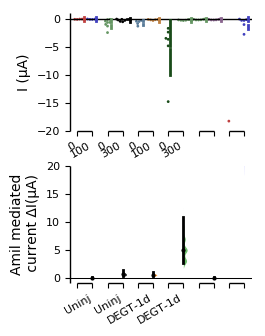

In [127]:
#plt.figure(figsize=(3.5, 3)) 
fig1= multi_2group_Alanin.mean_diff.plot(swarm_ylim=(-20,1), contrast_ylim=(-1,20), fig_size=(2.8, 3.8),  raw_marker_size=(2),es_marker_size=2,contrast_label='Amil mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',custom_palette=colors, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,1], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = ['0','100','0','300','0','100','0','300']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')


labels2 = ['','Uninj','','Uninj','','DEGT-1d','','DEGT-1d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
# plt.savefig(filedirManuscript+"Fig3-supplement-AmilHigher"+'.pdf')
